<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras TF 2.0 - Code Along Classification Project

Let's explore a classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [4]:
df.describe().transpose()
#observation: no missing data

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

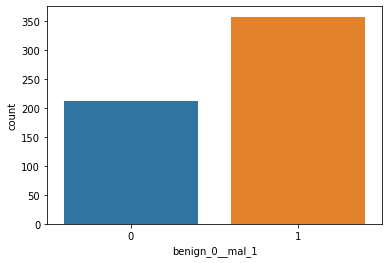

In [6]:
#examine response variable instances (benight 0 or malignant 1)
sns.countplot(x='benign_0__mal_1',data=df)
#observations: slightly more malignant tumours but not a drastic difference

In [8]:
#examine variable correlations
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


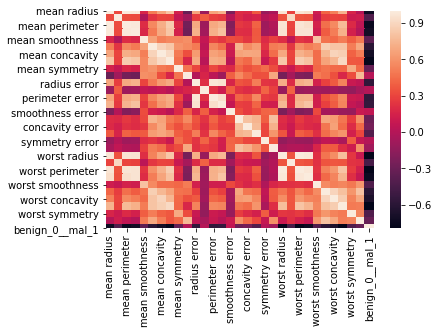

In [9]:
#view correlation as a heatmap
sns.heatmap(df.corr())

In [12]:
#view correlation specifically for variables against our response
df.corr()['benign_0__mal_1'].sort_values()
#observations: quite a few vars with strong negative correlation

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

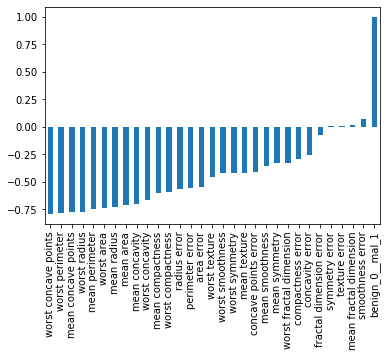

In [15]:
#sometimes viewing these sorted correlations with a plot can be a nice viz
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')
#observations: we see what we saw above, visually (note last one is against itself, i.e., corr=1)

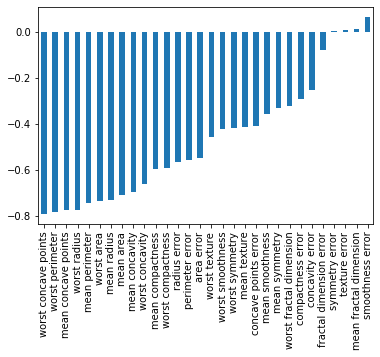

In [18]:
#removing the redundant corr against itself
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

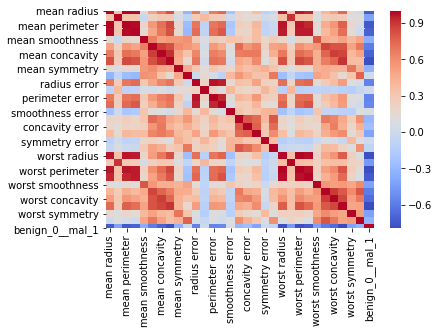

In [27]:
#correlation heatmap
sns.heatmap(df.corr(),cmap='coolwarm')

## Train Test Split

In [61]:
#split into our train and test sets
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [62]:
#quick check
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [35]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)


## Scaling Data

In [64]:
#remember to scale our data!
from sklearn.preprocessing import MinMaxScaler

In [65]:
scaler = MinMaxScaler()

In [66]:
#fit and transform train set
X_train = scaler.fit_transform(X_train)

In [67]:
#only transform test set (not fit) to prevent data leakage
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [68]:
X_train.shape
#observe that we have 30 features = # neurons

(426, 30)

In [69]:
model = Sequential() #create empty sequential model

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(30,activation='relu')) #add in individual layers
model.add(Dense(15,activation='relu')) #we'll cut in half to 15, why? idk

#BINARY CLASSIFICATION PROBLEM
model.add(Dense(1,activation='sigmoid')) #model end point (sigmoid activation because this is a binary classification problem)

model.compile(optimizer='adam',loss='binary_crossentropy') #select optimizer (adam) and loss function (binary_crossentropy for binary classification)

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [70]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

#fitting our model
model.fit(x=X_train,y=y_train,
         validation_data=(X_test,y_test),
         epochs=600) #here instructor has set epochs very high to illustrate overfitting

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6841 - val_loss: 0.6655
Epoch 2/600
426/426 [==============================] - 0s 84us/sample - loss: 0.6449 - val_loss: 0.6319
Epoch 3/600
426/426 [==============================] - 0s 84us/sample - loss: 0.6040 - val_loss: 0.5923
Epoch 4/600
426/426 [==============================] - 0s 83us/sample - loss: 0.5610 - val_loss: 0.5446
Epoch 5/600
426/426 [==============================] - 0s 78us/sample - loss: 0.5098 - val_loss: 0.4860
Epoch 6/600
426/426 [==============================] - 0s 82us/sample - loss: 0.4533 - val_loss: 0.4273
Epoch 7/600
426/426 [==============================] - 0s 78us/sample - loss: 0.3977 - val_loss: 0.3673
Epoch 8/600
426/426 [==============================] - 0s 81us/sample - loss: 0.3463 - val_loss: 0.3173
Epoch 9/600
426/426 [==============================] - 0s 78us/sample - loss: 0.3048 - val_loss: 0.2747
Epoch 10/600
426/42

426/426 [==============================] - 0s 97us/sample - loss: 0.0282 - val_loss: 0.1030
Epoch 156/600
426/426 [==============================] - 0s 92us/sample - loss: 0.0291 - val_loss: 0.1033
Epoch 157/600
426/426 [==============================] - 0s 95us/sample - loss: 0.0284 - val_loss: 0.1089
Epoch 158/600
426/426 [==============================] - 0s 90us/sample - loss: 0.0266 - val_loss: 0.1026
Epoch 159/600
426/426 [==============================] - 0s 78us/sample - loss: 0.0266 - val_loss: 0.1063
Epoch 160/600
426/426 [==============================] - 0s 79us/sample - loss: 0.0257 - val_loss: 0.0986
Epoch 161/600
426/426 [==============================] - 0s 83us/sample - loss: 0.0296 - val_loss: 0.1029
Epoch 162/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0260 - val_loss: 0.0995
Epoch 163/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0279 - val_loss: 0.1069
Epoch 164/600
426/426 [==============================] - 0

Epoch 232/600
426/426 [==============================] - 0s 69us/sample - loss: 0.0210 - val_loss: 0.1004
Epoch 233/600
426/426 [==============================] - 0s 72us/sample - loss: 0.0306 - val_loss: 0.1056
Epoch 234/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0216 - val_loss: 0.0923
Epoch 235/600
426/426 [==============================] - 0s 83us/sample - loss: 0.0234 - val_loss: 0.1059
Epoch 236/600
426/426 [==============================] - 0s 100us/sample - loss: 0.0186 - val_loss: 0.0946
Epoch 237/600
426/426 [==============================] - 0s 116us/sample - loss: 0.0171 - val_loss: 0.0964
Epoch 238/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0173 - val_loss: 0.0923
Epoch 239/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0177 - val_loss: 0.1042
Epoch 240/600
426/426 [==============================] - 0s 64us/sample - loss: 0.0180 - val_loss: 0.0966
Epoch 241/600
426/426 [=====================

Epoch 309/600
426/426 [==============================] - 0s 91us/sample - loss: 0.0138 - val_loss: 0.0992
Epoch 310/600
426/426 [==============================] - 0s 100us/sample - loss: 0.0132 - val_loss: 0.0934
Epoch 311/600
426/426 [==============================] - 0s 88us/sample - loss: 0.0122 - val_loss: 0.0993
Epoch 312/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0142 - val_loss: 0.0946
Epoch 313/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0178 - val_loss: 0.0905
Epoch 314/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0127 - val_loss: 0.0988
Epoch 315/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0118 - val_loss: 0.0893
Epoch 316/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0127 - val_loss: 0.0898
Epoch 317/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0122 - val_loss: 0.1019
Epoch 318/600
426/426 [======================

426/426 [==============================] - 0s 71us/sample - loss: 0.0058 - val_loss: 0.1038
Epoch 464/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0057 - val_loss: 0.1087
Epoch 465/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0065 - val_loss: 0.0987
Epoch 466/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0063 - val_loss: 0.1084
Epoch 467/600
426/426 [==============================] - 0s 71us/sample - loss: 0.0060 - val_loss: 0.1059
Epoch 468/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0070 - val_loss: 0.1092
Epoch 469/600
426/426 [==============================] - 0s 71us/sample - loss: 0.0078 - val_loss: 0.0996
Epoch 470/600
426/426 [==============================] - 0s 69us/sample - loss: 0.0070 - val_loss: 0.1142
Epoch 471/600
426/426 [==============================] - 0s 72us/sample - loss: 0.0058 - val_loss: 0.1062
Epoch 472/600
426/426 [==============================] - 0s 

In [55]:
model.history.history

{'loss': [0.6878219146124074,
  0.6566647319166873,
  0.6164958001302442,
  0.5711375737973782,
  0.5174962490657126,
  0.4620935799370349,
  0.40662053968984757,
  0.3559329327842999,
  0.31605287225033757,
  0.2840077145278734,
  0.2595697349645722,
  0.24037683485819142,
  0.22397448171472326,
  0.21077438702745616,
  0.19597417193119515,
  0.18559755626278865,
  0.17765669251831484,
  0.17286659392392692,
  0.1677835138838196,
  0.1548984901271236,
  0.1455172639637486,
  0.141590539733289,
  0.13276607767097268,
  0.12635947853116922,
  0.1205021794972845,
  0.11633175415612163,
  0.11388246715068817,
  0.1086430516391293,
  0.10438726513598447,
  0.10122112177767105,
  0.09578559367956829,
  0.09319936057351565,
  0.09215373409466004,
  0.08911485753148934,
  0.0854862818030964,
  0.08332890768845876,
  0.08181379042880636,
  0.07989370466118127,
  0.07678949642279338,
  0.07620488019756308,
  0.07553757508525825,
  0.07485008001887182,
  0.0730374598167312,
  0.07150677385184687

In [71]:
model_loss = pd.DataFrame(model.history.history)

In [72]:
model_loss #we see both loss and validation data loss in our df

,loss,val_loss
0,0.684102,0.665540
1,0.644864,0.631867
2,0.604016,0.592292
3,0.561028,0.544606
4,0.509783,0.486021
...,...,...
595,0.002439,0.129323
596,0.002789,0.135624
597,0.002805,0.130118
598,0.002964,0.131878


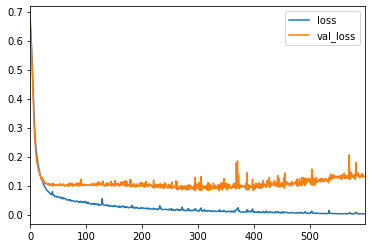

In [73]:
model_loss.plot()
#observations: VERY INTERESTING - PERFECT EXAMPLE OF OVERFITTING
#notice that in the beginning both training loss and validation loss are decreasing...
#however, at around 30ish epochs our training loss continues to lower, while
#our validation loss STOPS DECREASING...actually starts increasing --> OVERFITTING
#let's use early stopping to prevent us for running over excessive epochs

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [74]:
#COPIED IN FROM ABOVE (we want to create a new instance as we don't want to rerun on identical model)

model = Sequential() #create empty sequential model

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(30,activation='relu')) #add in individual layers
model.add(Dense(15,activation='relu')) #we'll cut in half to 15, why? idk

#BINARY CLASSIFICATION PROBLEM
model.add(Dense(1,activation='sigmoid')) #model end point (sigmoid activation because this is a binary classification problem)

model.compile(optimizer='adam',loss='binary_crossentropy') #select optimizer (adam) and loss function (binary_crossentropy for binary classification)

In [76]:
from tensorflow.keras.callbacks import EarlyStopping

In [77]:
help(EarlyStopping) #to explore more about callbacks
#monitor and patience parameters look the most useful

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [78]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=25,verbose=1)

#PARAMETER EXPLANATIONS BELOW
#monitor is set to val_loss as this is the quantity we want to monitor
#mode is set to min as we want to minimize our val_loss (e.g., would be 'max' if we were monitoring accuracy)
#patience is set to 25 indicating that we'll wait for 25 epochs of no improvement before we initiate the early stop

In [79]:
#fitting our model, now w/ early stopping enabled (this allows us to arbitrarily
#set a rather large number of epochs and feel safe we won't overfit)
model.fit(x=X_train,y=y_train,
         validation_data=(X_test,y_test),
         epochs=600,callbacks=[early_stop])
#observations: notice we've stopped at epoch 80

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 5ms/sample - loss: 0.7036 - val_loss: 0.6893
Epoch 2/600
426/426 [==============================] - 0s 269us/sample - loss: 0.6655 - val_loss: 0.6515
Epoch 3/600
426/426 [==============================] - 0s 205us/sample - loss: 0.6315 - val_loss: 0.6187
Epoch 4/600
426/426 [==============================] - 0s 202us/sample - loss: 0.5988 - val_loss: 0.5822
Epoch 5/600
426/426 [==============================] - 0s 221us/sample - loss: 0.5591 - val_loss: 0.5385
Epoch 6/600
426/426 [==============================] - 0s 223us/sample - loss: 0.5164 - val_loss: 0.4912
Epoch 7/600
426/426 [==============================] - 0s 231us/sample - loss: 0.4700 - val_loss: 0.4419
Epoch 8/600
426/426 [==============================] - 0s 147us/sample - loss: 0.4209 - val_loss: 0.3897
Epoch 9/600
426/426 [==============================] - 0s 160us/sample - loss: 0.3753 - val_loss: 0.3479
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 165us/sample - loss: 0.0564 - val_loss: 0.1117
Epoch 79/600
426/426 [==============================] - 0s 178us/sample - loss: 0.0577 - val_loss: 0.1026
Epoch 80/600
426/426 [==============================] - 0s 196us/sample - loss: 0.0559 - val_loss: 0.1097
Epoch 00080: early stopping


In [80]:
model_loss = pd.DataFrame(model.history.history)

In [81]:
model_loss #here we have our loss df again

,loss,val_loss
0,0.703643,0.689277
1,0.665497,0.651506
2,0.631535,0.618700
3,0.598813,0.582189
4,0.559061,0.538547
...,...,...
75,0.057170,0.106366
76,0.057450,0.102452
77,0.056407,0.111680
78,0.057677,0.102554


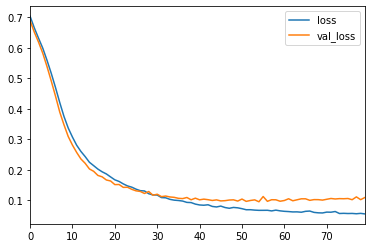

In [82]:
#plot and compare our loss functions between training and validation
model_loss.plot()
#observations: now we see something much more viable - training and validation
#loss are very close and validation loss isn't increasing

## Example Three: Adding in DropOut Layers

In [85]:
from tensorflow.keras.layers import Dropout
#we technically already did this above, but wanted to show that Dropout also comes from keras.layers

In [86]:
#COPIED IN FROM ABOVE (we want to create a new instance as we don't want to rerun on identical model)

model = Sequential() #create empty sequential model

model.add(Dense(30,activation='relu')) #add in individual layers
model.add(Dropout(rate=0.5)) #dropout rate is the probability that we randomly turn off (i.e., rates and biases won't be updated) the neurons in this layer (common dropout rate values are b/w 0.2-0.5)

model.add(Dense(15,activation='relu')) #we'll cut in half to 15, why? idk
model.add(Dropout(rate=0.5))

#BINARY CLASSIFICATION PROBLEM
model.add(Dense(1,activation='sigmoid')) #model end point (sigmoid activation because this is a binary classification problem)

model.compile(optimizer='adam',loss='binary_crossentropy') #select optimizer (adam) and loss function (binary_crossentropy for binary classification)

In [87]:
#let's fit our model again, this time combining our dropout layers added
#above, with the early stop we previously implemented
model.fit(x=X_train,y=y_train,
         validation_data=(X_test,y_test),
         epochs=600,callbacks=[early_stop])
#observations: notice we've stopped at epoch 146 this time (means that it was learning for longer)

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6834 - val_loss: 0.6455
Epoch 2/600
426/426 [==============================] - 0s 166us/sample - loss: 0.6609 - val_loss: 0.6234
Epoch 3/600
426/426 [==============================] - 0s 163us/sample - loss: 0.6288 - val_loss: 0.6035
Epoch 4/600
426/426 [==============================] - 0s 236us/sample - loss: 0.6279 - val_loss: 0.5855
Epoch 5/600
426/426 [==============================] - 0s 212us/sample - loss: 0.5981 - val_loss: 0.5665
Epoch 6/600
426/426 [==============================] - 0s 288us/sample - loss: 0.5901 - val_loss: 0.5448
Epoch 7/600
426/426 [==============================] - 0s 182us/sample - loss: 0.5757 - val_loss: 0.5250
Epoch 8/600
426/426 [==============================] - 0s 137us/sample - loss: 0.5613 - val_loss: 0.5013
Epoch 9/600
426/426 [==============================] - 0s 118us/sample - loss: 0.5450 - val_loss: 0.4834
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 150us/sample - loss: 0.1246 - val_loss: 0.0786
Epoch 79/600
426/426 [==============================] - 0s 176us/sample - loss: 0.1267 - val_loss: 0.0796
Epoch 80/600
426/426 [==============================] - 0s 185us/sample - loss: 0.1570 - val_loss: 0.0797
Epoch 81/600
426/426 [==============================] - 0s 179us/sample - loss: 0.1326 - val_loss: 0.0802
Epoch 82/600
426/426 [==============================] - 0s 169us/sample - loss: 0.1244 - val_loss: 0.0897
Epoch 83/600
426/426 [==============================] - 0s 173us/sample - loss: 0.1154 - val_loss: 0.0842
Epoch 84/600
426/426 [==============================] - 0s 176us/sample - loss: 0.1164 - val_loss: 0.0795
Epoch 85/600
426/426 [==============================] - 0s 170us/sample - loss: 0.1277 - val_loss: 0.0912
Epoch 86/600
426/426 [==============================] - 0s 228us/sample - loss: 0.1268 - val_loss: 0.0876
Epoch 87/600
426/426 [========================

In [88]:
model_loss = pd.DataFrame(model.history.history)

In [89]:
model_loss

,loss,val_loss
0,0.683419,0.645504
1,0.660895,0.623425
2,0.628751,0.603501
3,0.627943,0.585543
4,0.598148,0.566490
...,...,...
141,0.085731,0.090746
142,0.089160,0.081466
143,0.076694,0.081754
144,0.084395,0.081843


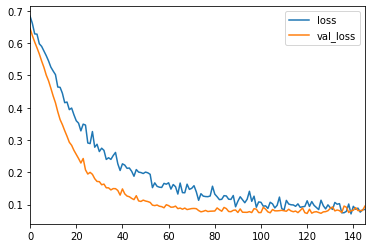

In [91]:
model_loss.plot()
#observations: "this is absolutely fantastic" - both training loss and
#validation loss are decreasing at the same rate basically throughout the full epoch scope

# Model Evaluation

In [93]:
#note predict_classes here
predictions = model.predict_classes(X_test)

In [96]:
#preview our predictions
predictions

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [97]:
from sklearn.metrics import classification_report, confusion_matrix

In [99]:
# https://en.wikipedia.org/wiki/Precision_and_recall

print(classification_report(y_test, predictions))
#observations: 97% accuracy, our ANN model is very strong!

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [100]:
print(confusion_matrix(y_test,predictions))
#observations: only misclassified 5 records

[[54  1]
 [ 4 84]]
